In [526]:
 #import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math

In [479]:
df = pd.read_csv('answer_train.csv')
df

,filename,real_letter_R,real_letter_L
0,1,0,1
1,2,1,0
2,3,1,1
3,4,1,0
4,5,1,1
...,...,...,...
1395,1396,0,1
1396,1397,1,1
1397,1398,1,1
1398,1399,1,1


In [60]:
df_answer = df.sort_values(by="filename", ascending = True)
df_answer = df_answer.set_index(['filename'])
df_answer

,real_letter_R,real_letter_L
filename,,
1,0,1
2,1,0
3,1,1
4,1,0
5,1,1
...,...,...
1396,0,1
1397,1,1
1398,1,1


In [61]:
df_none = df_answer[(df_answer['real_letter_R']==0) &(df_answer['real_letter_L']==0)] 
df_none

,real_letter_R,real_letter_L
filename,,
66,0,0
78,0,0
120,0,0
151,0,0
166,0,0
243,0,0
296,0,0
299,0,0
361,0,0


In [39]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

df_none Count: 31


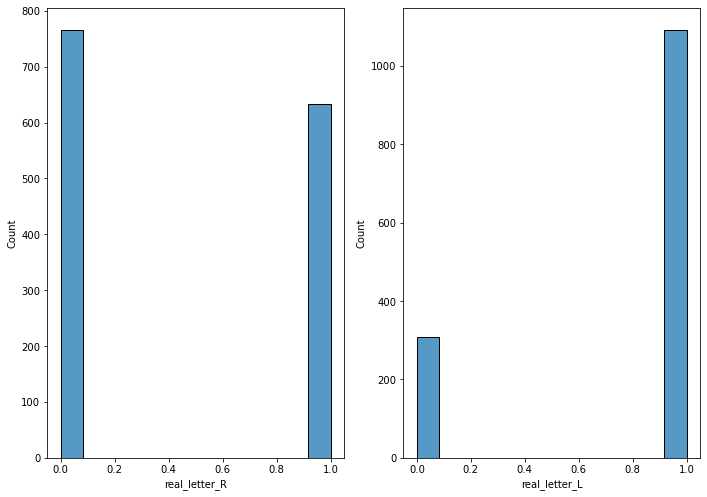

In [67]:
fig, ax = plt.subplots(ncols=2)
#sns.boxplot("letter_R", data=df_sort, ax=ax[0])
sns.histplot(df['real_letter_R'], ax=ax[0])
sns.histplot(df['real_letter_L'], ax=ax[1])
print("df_none Count:", len(df_none))

Text(0, 0.5, '')

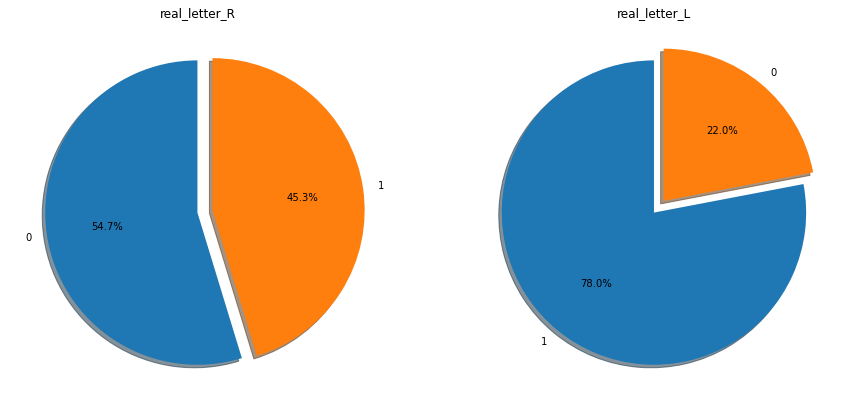

In [683]:
fig, ax = plt.subplots(1, 2, figsize=(15,7)) 
# subplot : 한 화면에서 여러 그래프를 나눠서 출력하는 기능 / plt.subplots((행 ,열, 그래프의 크기(가로, 세로)))
df_answer['real_letter_R'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[0].set_title('real_letter_R') # 파이 그래프 이름
ax[0].set_ylabel('') # 파이 그래프
 
df_answer['real_letter_L'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[1],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[1].set_title('real_letter_L') # 파이 그래프 이름
ax[1].set_ylabel('') # 파이 그래프

# 0 = 죽음, 1 = 생존
# 61.6%가 죽음 38.4%가 생존



In [687]:
pd.crosstab(df_answer['real_letter_R'], df_answer['real_letter_L'], margins=True).style.background_gradient(cmap='summer_r')

real_letter_L,0,1,All
real_letter_R,,,
0,31,735,766
1,277,357,634
All,308,1092,1400


In [723]:
df_pred = pd.read_csv('predict.csv')
df_pred = df_pred.drop(['Unnamed: 0'], axis = 1)
df_pred[df_pred['file_name']==1408]


,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob
2,1408,1456,1470,500,2033,2806,1526,3763,2145,-540,2905,4100,401,0.999643,0.988582,0.947526,0.945597,0.044691,0.97056


In [724]:
temp = list(map(int, df_pred['file_name']))
temp[:3]
#for i in range(len(temp)):
#    #print(i)
#    new = temp[i]-1400
#    temp[i] = new

[1477, 1912, 1408]

In [725]:
#df_pred['file_name'] = temp
df_pred = df_pred.sort_values(by = 'file_name', ascending = True)
df_pred[:10]

,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob
264,1401,1248,626,695,1067,1616,589,2205,994,106,2135,2610,810,0.934462,0.987024,0.966347,0.989398,0.111130,0.969031
330,1402,777,893,415,1228,1334,921,1724,1200,80,197,2114,85,0.955955,1.007496,0.966963,1.000893,0.973859,0.281045
260,1403,833,726,387,1061,1390,698,1808,1088,-267,1493,1975,1005,0.991376,0.920776,0.963368,0.933164,0.057326,0.963742
295,1404,1090,1285,464,1715,2028,1246,2575,1715,152,2770,2848,2926,0.981033,0.980444,0.953588,0.983819,0.840128,0.971291
496,1405,833,726,443,1033,1362,726,1780,1005,136,949,164,1088,0.945412,0.933880,0.867457,0.862732,0.870817,0.049663
78,1406,1051,1598,347,2067,1793,1559,2496,2028,74,2926,2926,2770,0.985178,0.973727,0.978294,0.959130,0.950005,0.912044
340,1407,3880,1879,2866,1316,444,1879,1289,1147,3936,978,3992,978,0.569667,0.482908,0.577057,0.547053,0.326717,0.627345
2,1408,1456,1470,500,2033,2806,1526,3763,2145,-540,2905,4100,401,0.999643,0.988582,0.947526,0.945597,0.044691,0.970560
461,1409,1035,975,613,1364,1555,1040,1977,1397,159,228,2334,260,0.958911,0.999479,0.972380,0.976758,0.365927,0.925923
121,1410,839,865,392,1207,1207,865,1628,1207,49,1997,1944,1076,0.938017,0.956888,0.966194,0.965492,0.087490,0.967634


In [726]:
df_pred[df_pred['file_name'] == 1408]

,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob
2,1408,1456,1470,500,2033,2806,1526,3763,2145,-540,2905,4100,401,0.999643,0.988582,0.947526,0.945597,0.044691,0.97056


In [727]:
#print(df_pred.dtypes)

In [728]:
name_pred = list(df_pred['file_name'])
df_pred['middle'] = (df_pred['right_medial_x'] + df_pred['left_medial_x'])/2
middle_pred = list(map(int, df_pred['middle']))

In [729]:
r_prob_pred = list(df_pred['letter_R_prob'])
l_prob_pred = list(df_pred['letter_L_prob'])
right_medial_pred= list(zip(df_pred['right_medial_x'], df_pred['right_medial_y']))
left_medial_pred = list(zip(df_pred['left_medial_x'], df_pred['left_medial_y']))
right_f = list(zip(df_pred['right_f_x'], df_pred['right_f_y']))
left_f = list(zip(df_pred['left_f_x'], df_pred['left_f_y']))
right_letter = list(zip(df_pred['letter_R_x'], df_pred['letter_R_y']))
left_letter = list(zip(df_pred['letter_L_x'], df_pred['letter_L_y']))

In [730]:
letter_R_x_pred = list(df_pred['letter_R_x'])
letter_L_x_pred = list(df_pred['letter_L_x'])


In [731]:
file_view_pred = list(zip(name, middle, right_medial_pred, left_medial_pred, right_f, left_f, r_prob_pred, l_prob_pred, right_letter, left_letter))

In [732]:
#result = math.sqrt( math.pow(df_pred['letter_R_x']- x2, 2) + math.pow(y1 - y2, 2))

In [733]:
df_pred.head(10)

,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob,middle
264,1401,1248,626,695,1067,1616,589,2205,994,106,2135,2610,810,0.934462,0.987024,0.966347,0.989398,0.111130,0.969031,1432.0
330,1402,777,893,415,1228,1334,921,1724,1200,80,197,2114,85,0.955955,1.007496,0.966963,1.000893,0.973859,0.281045,1055.5
260,1403,833,726,387,1061,1390,698,1808,1088,-267,1493,1975,1005,0.991376,0.920776,0.963368,0.933164,0.057326,0.963742,1111.5
295,1404,1090,1285,464,1715,2028,1246,2575,1715,152,2770,2848,2926,0.981033,0.980444,0.953588,0.983819,0.840128,0.971291,1559.0
496,1405,833,726,443,1033,1362,726,1780,1005,136,949,164,1088,0.945412,0.933880,0.867457,0.862732,0.870817,0.049663,1097.5
78,1406,1051,1598,347,2067,1793,1559,2496,2028,74,2926,2926,2770,0.985178,0.973727,0.978294,0.959130,0.950005,0.912044,1422.0
340,1407,3880,1879,2866,1316,444,1879,1289,1147,3936,978,3992,978,0.569667,0.482908,0.577057,0.547053,0.326717,0.627345,2162.0
2,1408,1456,1470,500,2033,2806,1526,3763,2145,-540,2905,4100,401,0.999643,0.988582,0.947526,0.945597,0.044691,0.970560,2131.0
461,1409,1035,975,613,1364,1555,1040,1977,1397,159,228,2334,260,0.958911,0.999479,0.972380,0.976758,0.365927,0.925923,1295.0
121,1410,839,865,392,1207,1207,865,1628,1207,49,1997,1944,1076,0.938017,0.956888,0.966194,0.965492,0.087490,0.967634,1023.0


In [734]:
answer_distance = pd.read_csv('answer_distance.csv')
answer_distance['filename'] = answer_distance['filename'].add(1400)
answer_distance.head(7)


,filename,right_medial_x,right_medial_y,Y/N,right_f_x,right_f_y,Y/N.1,left_medial_x,left_medial_y,Y/N.2,left_f_x,left_f_y,Y/N.3,letter_R_x,letter_R_y,Y/N.4,letter_L_x,letter_L_y,Y/N.5
0,1401,1229,611,2,679,1061,2,1653,608,2,2210,1006,2,0,0,0,2621,821,2
1,1402,800,895,2,403,1212,2,1340,908,2,1741,1190,2,84,203,2,0,0,0
2,1403,834,715,2,372,1066,2,1374,701,2,1814,1082,2,0,0,0,1990,1007,2
3,1404,1106,1242,2,468,1730,2,2009,1233,2,2596,1739,2,144,2758,2,2866,2880,2
4,1405,850,719,2,430,1028,2,1363,695,2,1789,997,2,124,969,2,0,0,0
5,1406,1049,1583,2,324,2077,2,1790,1570,2,2487,1999,2,69,2933,2,2972,2755,2
6,1407,1354,1236,2,425,1868,2,2868,1297,2,3807,1926,2,0,0,0,3962,973,2


In [735]:
right_x_dist_answer= list(answer_distance['right_medial_x'])
right_y_dist_answer= list(answer_distance['right_medial_y'])
right_f_x_dist_answer= list(answer_distance['right_f_x'])
right_f_y_dist_answer= list(answer_distance['right_f_y'])


In [736]:
benchmark = []
for i in range(len(right_x_dist)):
    result = math.sqrt(math.pow(right_x_dist_answer[i] - right_f_x_dist_answer[i], 2) + math.pow(right_y_dist_answer[i] - right_f_y_dist_answer[i], 2))
    benchmark.append(int(result*0.1)) # 거리는 1/10

In [737]:
benchmark[:3] # 기준점은 얘다... right_medial과 right_f 거리의 1/10

[71, 50, 58]

In [738]:
letter_R_x_dist_answer= list(answer_distance['letter_R_x'])
letter_R_y_dist_answer= list(answer_distance['letter_R_y'])
letter_L_x_dist_answer= list(answer_distance['letter_L_x'])
letter_L_y_dist_answer= list(answer_distance['letter_L_y'])
letter_R_x_dist_pred= list(df_pred['letter_R_x'])
letter_R_y_dist_pred= list(df_pred['letter_R_y'])
letter_L_x_dist_pred= list(df_pred['letter_L_x'])
letter_L_y_dist_pred= list(df_pred['letter_L_y'])

In [739]:
dist_R= []
for i in range(len(right_x_dist)):
    result = math.sqrt(math.pow(letter_R_x_dist_answer[i] - letter_R_x_dist_pred[i], 2) + math.pow(letter_R_y_dist_answer[i] - letter_R_y_dist_pred[i], 2))
    dist_R.append(int(result))

In [740]:
dist_R[:3]

[2137, 7, 1516]

In [741]:
dist_L= []
for i in range(len(right_x_dist)):
    result = math.sqrt(math.pow(letter_L_x_dist_answer[i] - letter_L_x_dist_pred[i], 2) + math.pow(letter_L_y_dist_answer[i] - letter_L_y_dist_pred[i], 2))
    dist_L.append(int(result))

In [742]:
dist_L[:3]

[15, 2115, 15]

In [743]:
r_prob_pred[6]

0.32671705

In [744]:
answer = []
answer.append(['filename','pred_letter_R', 'pred_letter_L'])

for i in range(len(name)):
    temp = max(r_prob_pred[i], l_prob_pred[i])
    if (temp < 0.7):
        answer.append([name[i],0,0])
    elif ((r_prob_pred[i] < 0.7) & (middle_pred[i] < letter_L_x_pred[i])):
        answer.append([name[i],0,1])
    elif ((l_prob_pred[i] < 0.7) & (middle_pred[i] > letter_R_x_pred[i])):
        answer.append([name[i],1,0])
    else:
        answer.append([name[i],1,1])


In [745]:
#answer
with open('predict_val_0.7.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(answer)

In [488]:
#answer
with open('predict_val.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(answer)

In [639]:
answer_val = pd.read_csv('answer_val.csv')
answer_val['filename'] = answer_val['filename'].add(1400)
answer_val[:10]

,filename,real_letter_R,real_letter_L
0,1401,0,1
1,1402,1,0
2,1403,0,1
3,1404,1,1
4,1405,1,0
5,1406,1,1
6,1407,0,1
7,1408,0,1
8,1409,0,1
9,1410,0,1


Text(0, 0.5, '')

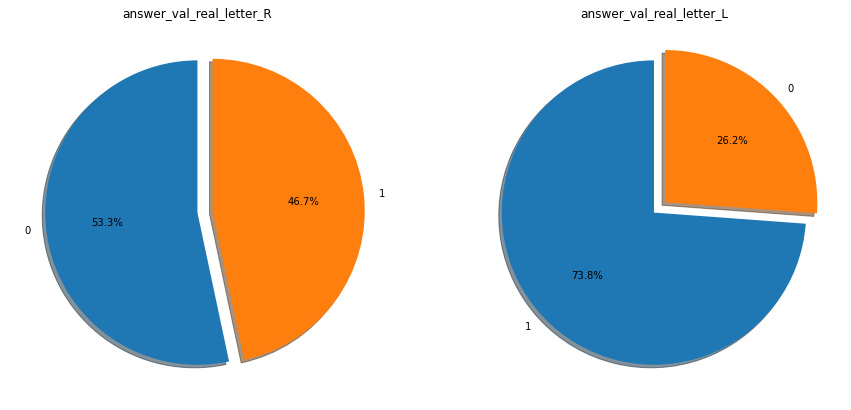

In [691]:
fig, ax = plt.subplots(1, 2, figsize=(15,7)) 
# subplot : 한 화면에서 여러 그래프를 나눠서 출력하는 기능 / plt.subplots((행 ,열, 그래프의 크기(가로, 세로)))
answer_val['real_letter_R'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[0].set_title('answer_val_real_letter_R') # 파이 그래프 이름
ax[0].set_ylabel('') # 파이 그래프
 
answer_val['real_letter_L'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[1],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[1].set_title('answer_val_real_letter_L') # 파이 그래프 이름
ax[1].set_ylabel('') # 파이 그래프

# 0 = 죽음, 1 = 생존
# 61.6%가 죽음 38.4%가 생존


In [689]:
pd.crosstab(answer_val['real_letter_R'], answer_val['real_letter_L'], margins=True).style.background_gradient(cmap='summer_r')


real_letter_L,0,1,All
real_letter_R,,,
0,7,313,320
1,150,130,280
All,157,443,600


In [633]:
answer_val_real_letter_R = list(answer_val['real_letter_R'])
answer_val_real_letter_L = list(answer_val['real_letter_L'])

In [775]:
predict_val =pd.read_csv('predict_val_0.8.csv')
predict_val.rename(columns = {'filename' : 'pred_filename'}, inplace = True)
predict_val[:10]

,pred_filename,pred_letter_R,pred_letter_L
0,1401,0,1
1,1402,1,0
2,1403,0,1
3,1404,1,1
4,1405,1,0
5,1406,1,1
6,1407,0,0
7,1408,0,1
8,1409,0,1
9,1410,0,1


Text(0, 0.5, '')

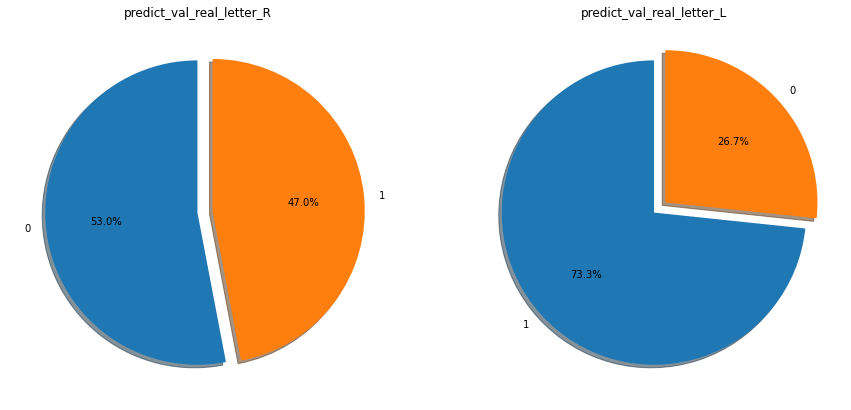

In [776]:
fig, ax = plt.subplots(1, 2, figsize=(15,7)) 
# subplot : 한 화면에서 여러 그래프를 나눠서 출력하는 기능 / plt.subplots((행 ,열, 그래프의 크기(가로, 세로)))
predict_val['pred_letter_R'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[0].set_title('predict_val_real_letter_R') # 파이 그래프 이름
ax[0].set_ylabel('') # 파이 그래프
 
predict_val['pred_letter_L'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[1],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[1].set_title('predict_val_real_letter_L') # 파이 그래프 이름
ax[1].set_ylabel('') # 파이 그래프

# 0 = 죽음, 1 = 생존
# 61.6%가 죽음 38.4%가 생존


In [778]:
pd.crosstab(predict_val['pred_letter_R'], predict_val['pred_letter_L'], margins=True).style.background_gradient(cmap='summer_r')


pred_letter_L,0,1,All
pred_letter_R,,,
0,12,306,318
1,148,134,282
All,160,440,600


In [696]:
predict_val_pred_letter_R = list(predict_val['pred_letter_R'])
predict_val_pred_letter_L = list(predict_val['pred_letter_L'])

In [697]:
total = pd.concat([answer_val, predict_val], axis = 1)
total[:10]

,filename,real_letter_R,real_letter_L,pred_filename,pred_letter_R,pred_letter_L
0,1401,0,1,1401,0,1
1,1402,1,0,1402,1,0
2,1403,0,1,1403,0,1
3,1404,1,1,1404,1,1
4,1405,1,0,1405,1,0
5,1406,1,1,1406,1,1
6,1407,0,1,1407,0,1
7,1408,0,1,1408,0,1
8,1409,0,1,1409,0,1
9,1410,0,1,1410,0,1


In [698]:
len(total[(total['real_letter_R'] == total['pred_letter_R']) & (total['real_letter_L'] == total['pred_letter_L'])])

555

In [699]:
len(total[(total['real_letter_R'] == total['pred_letter_R']) & (total['real_letter_L'] == total['pred_letter_L'])])/len(total)

0.925

In [700]:
len(total[(total['real_letter_R'] != total['pred_letter_R']) & (total['real_letter_L'] != total['pred_letter_L'])])

2

In [701]:
total[(total['real_letter_R'] != total['pred_letter_R']) & (total['real_letter_L'] != total['pred_letter_L'])]

,filename,real_letter_R,real_letter_L,pred_filename,pred_letter_R,pred_letter_L
278,1679,0,1,1679,1,0
474,1875,0,1,1875,1,0


In [702]:
len(total[(total['real_letter_R'] != total['pred_letter_R']) | (total['real_letter_L'] != total['pred_letter_L'])])

45

In [703]:
wrong = total[(total['real_letter_R'] != total['pred_letter_R']) | (total['real_letter_L'] != total['pred_letter_L'])]
wrong

,filename,real_letter_R,real_letter_L,pred_filename,pred_letter_R,pred_letter_L
20,1421,1,0,1421,1,1
25,1426,1,0,1426,1,1
52,1453,0,1,1453,1,1
72,1473,1,0,1473,1,1
94,1495,0,1,1495,1,1
97,1498,0,1,1498,1,1
101,1502,0,0,1502,0,1
161,1562,1,1,1562,1,0
171,1572,0,0,1572,1,0
174,1575,1,0,1575,0,0


In [507]:
name_list = list(wrong['pred_filename'])

In [508]:
name_list[0]

1407

In [509]:
file_view = list(file_view)
file_view[:1]

[(1401,
  1432,
  (1248, 626),
  (1616, 589),
  (695, 1067),
  (2205, 994),
  0.111130394,
  0.96903116,
  (106, 2135),
  (2610, 810))]

In [517]:
temp_2 = []

for i in range(len(file_view)):
    if int(file_view[i][0]) in name_list:
        temp_2.append(file_view[i])
print(temp_2)

[(1407, 2162, (3880, 1879), (444, 1879), (2866, 1316), (1289, 1147), 0.32671705, 0.6273452, (3936, 978), (3992, 978)), (1421, 1181, (944, 866), (1418, 866), (582, 1144), (1780, 1144), 1.0199909, 0.9428987, (164, 253), (2059, 197)), (1445, 1414, (1006, 1676), (1822, 1676), (423, 2142), (2482, 2142), 0.61144114, 0.9432353, (34, 1404), (2910, 1404)), (1453, 2131, (1681, 2033), (2581, 2033), (838, 2595), (3481, 2651), 0.78794193, 0.9678449, (556, 289), (4213, 514)), (1495, 1505, (1285, 994), (1726, 994), (732, 1436), (2352, 1362), 0.91581386, 0.99831647, (33, 2209), (2573, 368)), (1498, 1230, (970, 780), (1490, 780), (418, 1170), (2107, 1170), 0.99465454, 0.98575217, (61, 228), (2334, 163)), (1502, 1505, (1174, 957), (1837, 957), (548, 1362), (2426, 1436), 0.22152308, 0.9357943, (143, 184), (2794, 110)), (1503, 2038, (3586, 2154), (491, 2099), (2868, 1602), (1210, 1547), 0.4062563, 0.70179975, (4028, 1215), (4028, 1215)), (1562, 1197, (797, 1063), (1598, 999), (253, 1383), (2110, 1319), 0.

In [513]:
r = (255,0,0)
g = (0,255,0)
b = (0,0,255)
w = (255,255,255)

In [514]:
import cv2

font = cv2.FONT_HERSHEY_DUPLEX

In [516]:
for i in temp_2:
    filename ='00000000' + str(i[0])
    print(filename)
    img = cv2.imread(filename + '.jpg')
    temp = max(i[6], i[7])
    print(i[6], i[7])
    draw_r = (int(i[1]/2),1700)
    draw_l = (int(draw_r[0]) + i[1],1700)
    print(draw_r,draw_l)
    if (temp < 0.5):
        print("I don't know")
        cv2.putText(img, "I don't know", draw_r, font, 2, (0,0,155), 2, cv2.LINE_AA)
        cv2.putText(img, "I don't know", draw_l, font, 2, (0,0,155), 2, cv2.LINE_AA)
    elif (i[6]<i[7]):
        print("R draw")
        cv2.putText(img, "R", draw_r, font, 2, (0,0,155), 2, cv2.LINE_AA)
        #cv2.putText(img, "L", draw_l, 1, 2, (255,255,0), 1, 8)      
    elif (i[6]>i[7]):
        print("L draw")
        cv2.putText(img, "L", draw_l, font, 2, (0,0,155), 2, cv2.LINE_AA)      
    p_img = cv2.line(img, i[2], i[2], r, 40)
    p_img = cv2.line(img, i[3], i[3], g, 40)
    p_img = cv2.line(img, i[4], i[4], b, 40)
    p_img = cv2.line(img, i[5], i[5], w, 40)
    p_img = cv2.line(img, i[8], i[8], r, 40)
    p_img = cv2.line(img, i[9], i[9], b, 40)
    
    cv2.imwrite('_test'+ filename + '.jpg', p_img)


        

SyntaxError: invalid syntax (929646967.py, line 3)

In [522]:
answer_distance = pd.read_csv('answer_distance.csv')
answer_distance['filename'] = answer_distance['filename'].add(1400)
answer_distance


,filename,right_medial_x,right_medial_y,Y/N,right_f_x,right_f_y,Y/N.1,left_medial_x,left_medial_y,Y/N.2,left_f_x,left_f_y,Y/N.3,letter_R_x,letter_R_y,Y/N.4,letter_L_x,letter_L_y,Y/N.5
0,1401,1229,611,2,679,1061,2,1653,608,2,2210,1006,2,0,0,0,2621,821,2
1,1402,800,895,2,403,1212,2,1340,908,2,1741,1190,2,84,203,2,0,0,0
2,1403,834,715,2,372,1066,2,1374,701,2,1814,1082,2,0,0,0,1990,1007,2
3,1404,1106,1242,2,468,1730,2,2009,1233,2,2596,1739,2,144,2758,2,2866,2880,2
4,1405,850,719,2,430,1028,2,1363,695,2,1789,997,2,124,969,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1996,1399,1615,2,529,2304,2,2784,1671,2,3699,2389,2,0,0,0,4299,2145,2
596,1997,728,654,2,357,905,2,1286,632,2,1637,914,2,0,0,0,1943,1387,2
597,1998,937,888,2,556,1161,2,1149,903,2,1533,1186,2,0,0,0,1920,339,2
598,1999,740,915,2,358,1261,2,1307,891,2,1721,1221,2,82,1203,2,0,0,0
